In [5]:
from hyrax import Hyrax

h = Hyrax(config_file='./astrominn_testing_runtime_config.toml')
h.config['train']['epochs'] = 10

[2025-11-21 09:20:18,679 hyrax.config_utils:INFO] Merging external default config from /Users/drew/code/applecider/src/applecider/default_config.toml
[2025-11-21 09:20:18,692 hyrax.config_utils:WARNING] Runtime config contains key or section 'train' which has no default defined. All configuration keys and sections must be defined in /Users/drew/code/hyrax/src/hyrax/hyrax_default_config.toml
[2025-11-21 09:20:18,692 hyrax.config_utils:WARNING] Runtime config contains key or section 'infer' which has no default defined. All configuration keys and sections must be defined in /Users/drew/code/hyrax/src/hyrax/hyrax_default_config.toml


In [6]:
ds = h.prepare()

[2025-11-21 09:20:21,359 hyrax.prepare:INFO] Finished Prepare


In [ ]:
ds['train'][10_431]

{'data': {'image': tensor([[[ 0.0146,  0.0161,  0.0155,  ...,  0.0155,  0.0158,  0.0160],
           [ 0.0153,  0.0152,  0.0159,  ...,  0.0160,  0.0159,  0.0157],
           [ 0.0163,  0.0149,  0.0150,  ...,  0.0159,  0.0149,  0.0162],
           ...,
           [ 0.0163,  0.0156,  0.0146,  ...,  0.0157,  0.0155,  0.0158],
           [ 0.0156,  0.0157,  0.0146,  ...,  0.0151,  0.0151,  0.0155],
           [ 0.0163,  0.0149,  0.0153,  ...,  0.0162,  0.0159,  0.0160]],
  
          [[ 0.0155,  0.0157,  0.0155,  ...,  0.0157,  0.0156,  0.0156],
           [ 0.0157,  0.0157,  0.0156,  ...,  0.0155,  0.0154,  0.0155],
           [ 0.0156,  0.0154,  0.0154,  ...,  0.0156,  0.0155,  0.0156],
           ...,
           [ 0.0156,  0.0155,  0.0156,  ...,  0.0156,  0.0158,  0.0154],
           [ 0.0157,  0.0156,  0.0156,  ...,  0.0156,  0.0156,  0.0153],
           [ 0.0157,  0.0157,  0.0155,  ...,  0.0156,  0.0157,  0.0156]],
  
          [[-0.0121,  0.0002,  0.0111,  ..., -0.0009,  0.0047,  0.0

In [12]:
h.set_config('model.AstroMiNN.use_probabilities', False)
m = h.train()

[2025-11-21 09:23:39,346 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.nn.CrossEntropyLoss.
[2025-11-21 09:23:39,346 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.optim.SGD.
[2025-11-21 09:23:42,473 hyrax.config_utils:WARNING] Cannot find default_config.toml for umap.UMAP.
[2025-11-21 09:23:42,474 hyrax.config_utils:INFO] Merging external default config from /Users/drew/code/applecider/src/applecider/default_config.toml
[2025-11-21 09:23:45,182 hyrax.models.model_registry:INFO] Setting model's self.optimizer from config: torch.optim.SGD with arguments: {'lr': 0.01, 'momentum': 0.9}.
[2025-11-21 09:23:45,183 hyrax.models.model_registry:INFO] Setting model's self.criterion from config: torch.nn.CrossEntropyLoss with default arguments.
[2025-11-21 09:23:45,183 hyrax.verbs.train:INFO] Training model: AstroMiNN
[2025-11-21 09:23:45,184 hyrax.verbs.train:INFO] Training dataset(s):
{'train': Name: data (primary dataset)
  Dataset class: applecid

  5%|4         | 1/21 [00:00<?, ?it/s]

  5%|4         | 1/21 [00:00<?, ?it/s]

  5%|4         | 1/21 [00:00<?, ?it/s]

  5%|4         | 1/21 [00:00<?, ?it/s]

  5%|4         | 1/21 [00:00<?, ?it/s]

  5%|4         | 1/21 [00:00<?, ?it/s]

  5%|4         | 1/21 [00:00<?, ?it/s]

  5%|4         | 1/21 [00:00<?, ?it/s]

  5%|4         | 1/21 [00:00<?, ?it/s]

  5%|4         | 1/21 [00:00<?, ?it/s]

[2025-11-21 09:31:41,131 hyrax.pytorch_ignite:INFO] Total training time: 475.60[s]
2025/11/21 09:31:41 INFO mlflow.system_metrics.system_metrics_monitor: Stopping system metrics monitoring...
2025/11/21 09:31:41 INFO mlflow.system_metrics.system_metrics_monitor: Successfully terminated system metrics monitoring!
[2025-11-21 09:31:41,443 hyrax.verbs.train:INFO] Finished Training


In [13]:
h.set_config('model.AstroMiNN.use_probabilities', True)
infer_ds = h.infer()

[2025-11-21 09:32:02,085 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.nn.CrossEntropyLoss.
[2025-11-21 09:32:02,085 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.optim.SGD.
[2025-11-21 09:32:02,086 hyrax.config_utils:WARNING] Cannot find default_config.toml for umap.UMAP.
[2025-11-21 09:32:02,087 hyrax.config_utils:INFO] Merging external default config from /Users/drew/code/applecider/src/applecider/default_config.toml
[2025-11-21 09:32:04,283 hyrax.models.model_registry:INFO] Setting model's self.optimizer from config: torch.optim.SGD with arguments: {'lr': 0.01, 'momentum': 0.9}.
[2025-11-21 09:32:04,284 hyrax.models.model_registry:INFO] Setting model's self.criterion from config: torch.nn.CrossEntropyLoss with default arguments.
[2025-11-21 09:32:04,284 hyrax.verbs.infer:INFO] Inference model: AstroMiNN
[2025-11-21 09:32:04,285 hyrax.verbs.infer:INFO] Inference dataset(s):
{'train': Name: data (primary dataset)
  Dataset class: applec

  5%|4         | 1/21 [00:00<?, ?it/s]

[2025-11-21 09:32:10,466 hyrax.pytorch_ignite:INFO] Total evaluation time: 5.73[s]
[2025-11-21 09:32:10,490 hyrax.verbs.infer:INFO] Inference Complete.


In [65]:
import numpy as np
res_list = []

for i in range(21):
    a = np.load(f"/Users/drew/code/applecider/docs/pre_executed/testing/results/20251121-093202-infer-MNMd/batch_{i}.npy")

    for i in a:
        max_ind = np.argmax(i['tensor'])
        res_list.append((str(i['id']), int(max_ind)))

In [66]:
import numpy as np
import glob

CLASSES = [
    ['SN Ia','SN Ic','SN Ib'],
    ['SN IIP', 'SN IIn','SN II', 'SN IIb'],
    ['Cataclysmic'],
    ['AGN'],
    ['Tidal Disruption Event']
]

real_class = []
pred_class = []
for k, v in res_list:
    # get all files in data directory that start with k
    files = glob.glob(f"/Users/drew/code/applecider/data/preprocessed_ztf_alerts/{k}*.npy")
    b = np.load(files[0], allow_pickle=True)

    pred_class.append(v)

    target = b.item().get('target')

    for i, c in enumerate(CLASSES):
        if target in c:
            target_class = i
            break

    real_class.append(target_class)


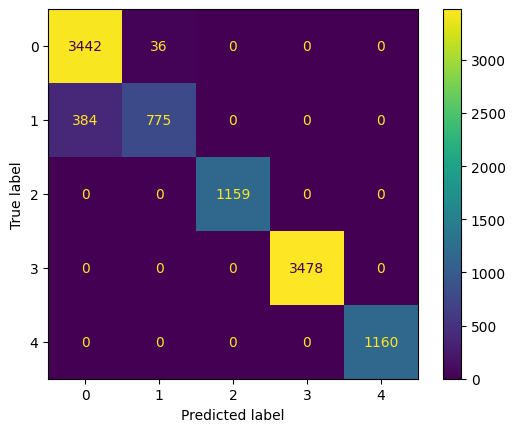

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(real_class, pred_class)).plot()